***DISEASES SYMPTOMS PREDICTION***

**Importing of Dataset**

In [37]:
import pandas as pd

data = pd.read_csv('./Disease_symptom_and_patient_profile_dataset.csv')
data.head(10)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
5,Eczema,Yes,No,No,No,25,Female,Normal,Normal,Positive
6,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
7,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
8,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative
9,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative


In [38]:
data.shape

(349, 10)

The dataset has 349 rows and 10 columns.

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


**DATA CLEANING**

First, we will check for null values.

In [40]:
data.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

We have no null values in our dataset.
Hence, we move to transforming our categorical data from object type to float type.

In [41]:
#using a function that will transform all columns except Disease column
from sklearn.preprocessing import LabelEncoder

def transform_data(data):
    label_encoder = LabelEncoder()
    for column in data.columns:
        if column != 'Disease':
            if data[column].dtype == 'object':
                data[column] = label_encoder.fit_transform(data[column])
            
    return data

data = transform_data(data)
data.head(10)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,1,0,1,1,19,0,1,2,1
1,Common Cold,0,1,1,0,25,0,2,2,0
2,Eczema,0,1,1,0,25,0,2,2,0
3,Asthma,1,1,0,1,25,1,2,2,1
4,Asthma,1,1,0,1,25,1,2,2,1
5,Eczema,1,0,0,0,25,0,2,2,1
6,Influenza,1,1,1,1,25,0,2,2,1
7,Influenza,1,1,1,1,25,0,2,2,1
8,Hyperthyroidism,0,1,0,0,28,0,2,2,0
9,Hyperthyroidism,0,1,0,0,28,0,2,2,0


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    int64 
 2   Cough                 349 non-null    int64 
 3   Fatigue               349 non-null    int64 
 4   Difficulty Breathing  349 non-null    int64 
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    int64 
 7   Blood Pressure        349 non-null    int64 
 8   Cholesterol Level     349 non-null    int64 
 9   Outcome Variable      349 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 27.4+ KB


By using LabelEncoder, it has transformed all the categorical data into numerical form.

**Number of Diseases**

By use of unique values we can see different number of diseases in the Dataset.

In [43]:
data['Disease'].value_counts()

Asthma                            23
Stroke                            16
Osteoporosis                      14
Hypertension                      10
Diabetes                          10
                                  ..
Autism Spectrum Disorder (ASD)     1
Hypoglycemia                       1
Fibromyalgia                       1
Eating Disorders (Anorexia,...     1
Williams Syndrome                  1
Name: Disease, Length: 116, dtype: int64

As per above, diseases like asthma, stroke, osteoporosis, hypertension and Diabetes are the most common. We have 116 different type of diseases.

***DATA VISUALIZATION***

Using seaborn and matplotlib libraries, we will visualize the data.

First, we will visualize the number of diseases.

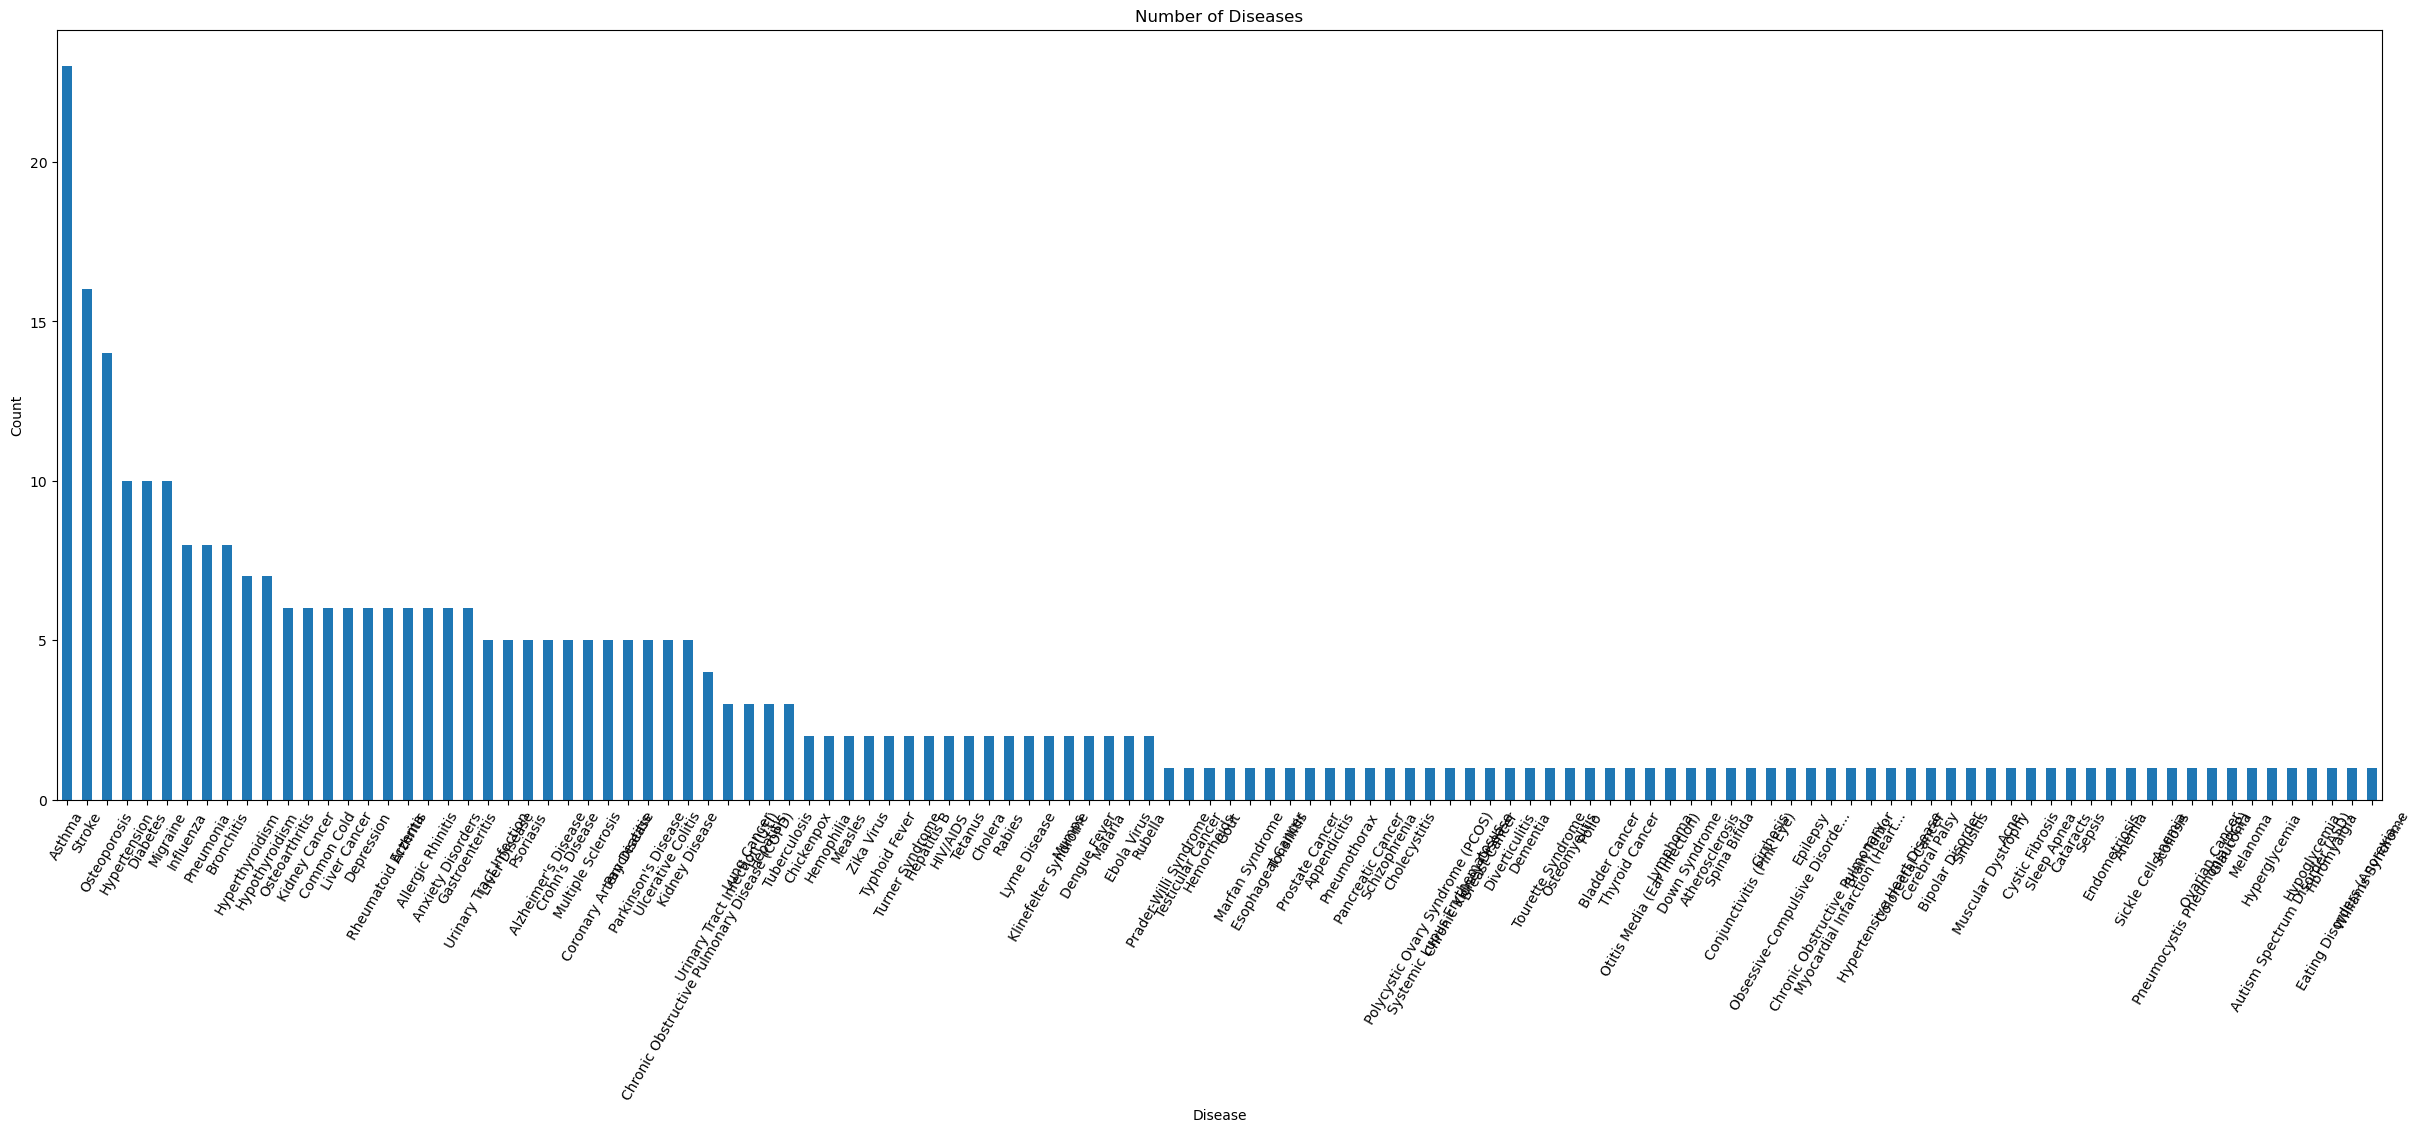

In [53]:

import matplotlib.pyplot as plt

disease_count = data['Disease'].value_counts()

disease_count.plot(kind='bar', figsize=(30, 10))
plt.xticks(rotation=60)
plt.title('Number of Diseases')
plt.xlabel('Diseases')
plt.ylabel('Count')
plt.show()